### Bulding and Visuaalizing Word Frequencies



In [2]:
# import necessary libraries 

import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np

from process_tweet import process_tweet

In [3]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [5]:
# download stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mozaini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# download datasets

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

all_tweets = positive_tweets + negative_tweets

print("number of tweets in our dataset: ", len(all_tweets))

number of tweets in our dataset:  10000


In [14]:
# create a numpy array in which the 1st 5k tweets will be labeld with 1s
# and the 2nd 5k will be denoted as 0s

labels = np.append(np.ones(len(positive_tweets)),np.zeros(len(negative_tweets)))
print("first 10 items of the array: ",labels[:10],'\nlast 10 items of the array: ',labels[len(labels) -10:])

first 10 items of the array:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 
last 10 items of the array:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
# create freq dict

freqs = build_freqs(all_tweets, labels)


In [16]:
# check data type
type(freqs)

dict

In [18]:
# length object

len(freqs)

13172

In [20]:
# print tweets sentiements and words freqs
freqs

{('followfriday', 1.0): 25,
 ('top', 1.0): 32,
 ('engag', 1.0): 7,
 ('member', 1.0): 16,
 ('commun', 1.0): 33,
 ('week', 1.0): 83,
 (':)', 1.0): 3691,
 ('hey', 1.0): 77,
 ('jame', 1.0): 7,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 99,
 ('call', 1.0): 37,
 ('contact', 1.0): 7,
 ('centr', 1.0): 2,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 8,
 ('assist', 1.0): 1,
 ('mani', 1.0): 33,
 ('thank', 1.0): 643,
 ('listen', 1.0): 17,
 ('last', 1.0): 47,
 ('night', 1.0): 68,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 51,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 21,
 ('yeaaah', 1.0): 1,
 ('yipppi', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 69,
 ('blue', 1.0): 9,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 6,
 ('profil', 1.0): 2,
 ('15', 1.0): 5,
 ('day', 1.0): 246,
 ('one', 1.0): 131,
 ('irresist', 1.0): 2,
 ('flipkartfashionfriday', 1.0): 17,
 ('like', 1.0): 233,
 ('keep', 1.0): 68,
 ('love', 1.0): 401,


In [25]:
# invistigate the data more

# we selsct random words that we would like to find in the tweets
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

# we will store each word with its positive and negative frequencies in a list called

data = []

# loop through our words
for word in keys:
#     initiate vars for positive and negative words frequenceis 
    pos = 0
    neg = 0
#     reterive numbers of positive words
    if (word,1) in freqs:
        pos = freqs[(word,1)]
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
    data.append([word, pos, neg])

In [26]:
data


[['happi', 212, 25],
 ['merri', 1, 0],
 ['nice', 99, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3691, 2],
 [':(', 1, 4584],
 ['😒', 2, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 5, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 27, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

/Users/mozaini/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mozaini/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0, flags=flags)


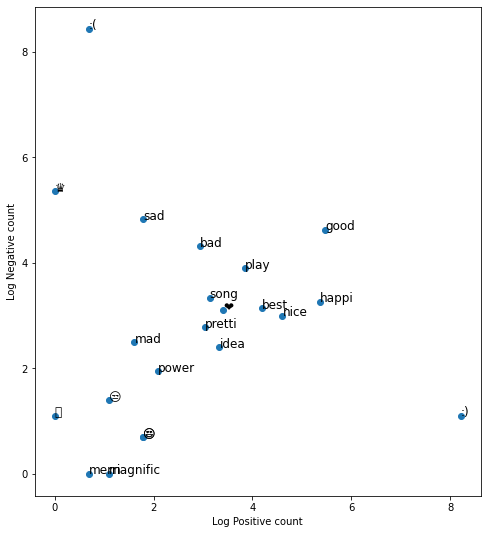

In [31]:
# lets plot the result in a diagram using scatter plot

fig, ax = plt.subplots(figsize= (8,9))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])
# same for y
y = np.log([x[2] + 1 for x in data]) 

ax.scatter(x, y)

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)
    
# we need to draw a line that divides the pos and neg tweets areas

ax.plot([0,9],[0,9], color ='orange')
plt.show